# **DESAFIO 01 - EVASÃO BANCÁRIA (CHURN)**

Vamos usar [este conjunto de dados](https://github.com/cassiusf/datasets/raw/refs/heads/main/desafios/Churn_Dataset.csv) para tentar prever evasão de clientes no setor bancário.

Este conjunto de dados contém informações sobre clientes bancários que deixaram o banco ou continuam sendo seus clientes. O conjunto de dados inclui as seguintes variáveis:

- **Customer ID**: identificador único para cada cliente
- **Surname**: sobrenome do cliente
- **Credit Score**: valor numérico representando o score de crédito do cliente, ou seja, uma classificação interna do quão bom pagador ele é
- **Geography**: país onde o cliente reside (França, Espanha ou Alemanha)
- **Gender**: gênero do cliente (masculino ou feminino)
- **Age**: idade do cliente.
- **Tenure**: número de anos que o cliente está no banco.
- **Balance**: saldo da conta do cliente.
- **NumOfProducts**: número de produtos bancários utilizados pelo cliente (por exemplo, conta poupança, cartão de crédito).
- **HasCrCard**: se o cliente tem um cartão de crédito (1 = sim, 0 = não).
- **IsActiveMember**: se o cliente é um membro ativo (1 = sim, 0 = não).
- **EstimatedSalary**: renda estimada do cliente.
- **Exited**: evasão do cliente (1 = sim, 0 = não) ***(Variável alvo)***.


## **TAREFA**

Seu objetivo é utilizar um modelo de machine learning rasa para prever a possibilidade de um cliente cancelar sua conta no banco.

Você deverá fazer todas es etapas necessárias tanto na avaliação dos dados disponíveis quanto na preparação necessária para execução do modelo escolhido.

Todas as etapas devem ser documentadas e as escolhas justificadas.

A performance do seu modelo deverá ser avaliada pelas métricas Acurácia, Precision, Recall e F1-Score. Inclua em sua avaliação final de performance Curvas, ROC e/ou Precision-Recall, de acordo com a necessidade.

### **1. Importação de bibliotecas e do carregamento do dataset**

###### Inicialmente, a primeira etapa ser feita foi importar as bibliotecas e módulos relevantes ao contexto do projeto e seu objetivo. Posteriormente, carregou-se o dataset relacionado ao churn - métrica que representa a evasão de clientes, neste caso a saída de cliente de um banco.

In [ ]:
# Importação das bibliotecas e módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, classification_report, confusion_matrix

In [ ]:
# Carregamento do conjunto de dados
url = "https://github.com/cassiusf/datasets/raw/refs/heads/main/desafios/Churn_Dataset.csv"
df = pd.read_csv(url)

### **2. Análise exploratória dos dados (EDA)**

###### Após a primeira fase mencionada, iniciou-se o processo de análise exploratória dos dados (EDA) com o objetivo principal de ter uma "primeira visão" do dataset trabalhado. Nesse sentido, é um ponto-chave entender o contexto, conteúdo e área a ser trabalhada e, por isso, a etapa de EDA é fundamental - uma vez que busca entender a estrutura, padrões e inconsistências dos dados por meio de estatísticas, visualizações e transformações. Desse modo, foi-se utilizado diversos métodos presentes na biblioteca "pandas" como describe(), info() e value_counts(), por exemplo. Além disso, criamos duas visualizações gráficas para perceber a relação entre a variável alvo com as demais variáveis.


###### Os boxplots são importantes na etapa de EDA para identificar outliers, distribuição, assimetria e dispersão dos dados de forma visual e intuitiva. Neles, é possível verificar que os princpais candidatos a outliers estão em Age e CreditScore.

###### Após isso, foram gerados diversos gráficos para ser analisada a presença de cada rótulo nas variáveis, identificando que algumas variáveis possuem valores com baixa presença e outras com desbalanceamento - principalmente em NumOfProducts e Geography -, porém de um modo geral a maioria das variáveis é balanceada.

In [ ]:
df.shape

(10002, 14)

In [ ]:
# Verificação do tipo das variáveis
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,float64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
# Análise Exploratória dos Dados (EDA)
# Verificação tipos de dados e valores ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
# Estatísticas descritivas
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


###### Como é possível observar abaixo, há uma alta cardinalidade em diversas features como, por exemplo, CreditScore, Balance, EstimatedSalary e Age. Nos casos de RowNumber, CustomerId e Surname, elas serão removidas como feito nas etapas posteriores.

In [ ]:
# Análise do número de rótulos únicos de cada variável presente no dataframe
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

RowNumber: 10000
CustomerId: 10000
Surname: 2932
CreditScore: 460
Geography: 3
Gender: 2
Age: 73
Tenure: 11
Balance: 6382
NumOfProducts: 4
HasCrCard: 2
IsActiveMember: 2
EstimatedSalary: 9999
Exited: 2


In [ ]:
# Agora, análise de quais são os rótulos presentes em cada variável presente no dataframe
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

RowNumber: [    1     2     3 ...  9998  9999 10000]
CustomerId: [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 7

In [ ]:
# Estatísticas para variáveis categóricas
df.describe(include='object')

,Surname,Geography,Gender
count,10002,10001,10002
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5458


In [ ]:
# Verificação de valores ausentes
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


###### Ao visualizar a contagem de valores da variável *target*, é possível observar um desbalanceamento visível entre os valores "0" e "1", sendo que o primeiro tem uma presença maior do que o segundo em cerca de quatro vezes.

Exited
0    7964
1    2038
Name: count, dtype: int64


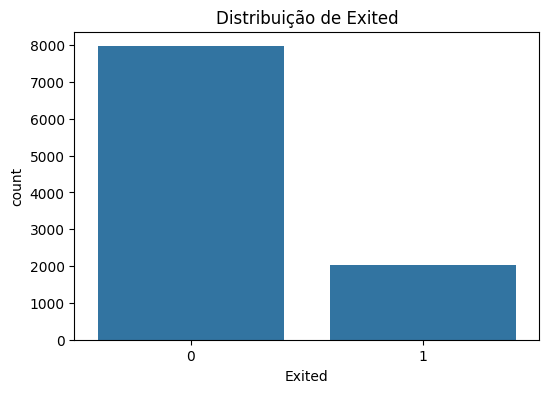

In [ ]:
# Visualização gráfica da distribuição da variável alvo ('Exited')
print(df['Exited'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Distribuição de Exited')
plt.show()

###### Ao visualizar os *boxplots*, é possível observar que a variável Age tem diversos candidatos a *outliers*, principalmente nos que não saíram do banco.

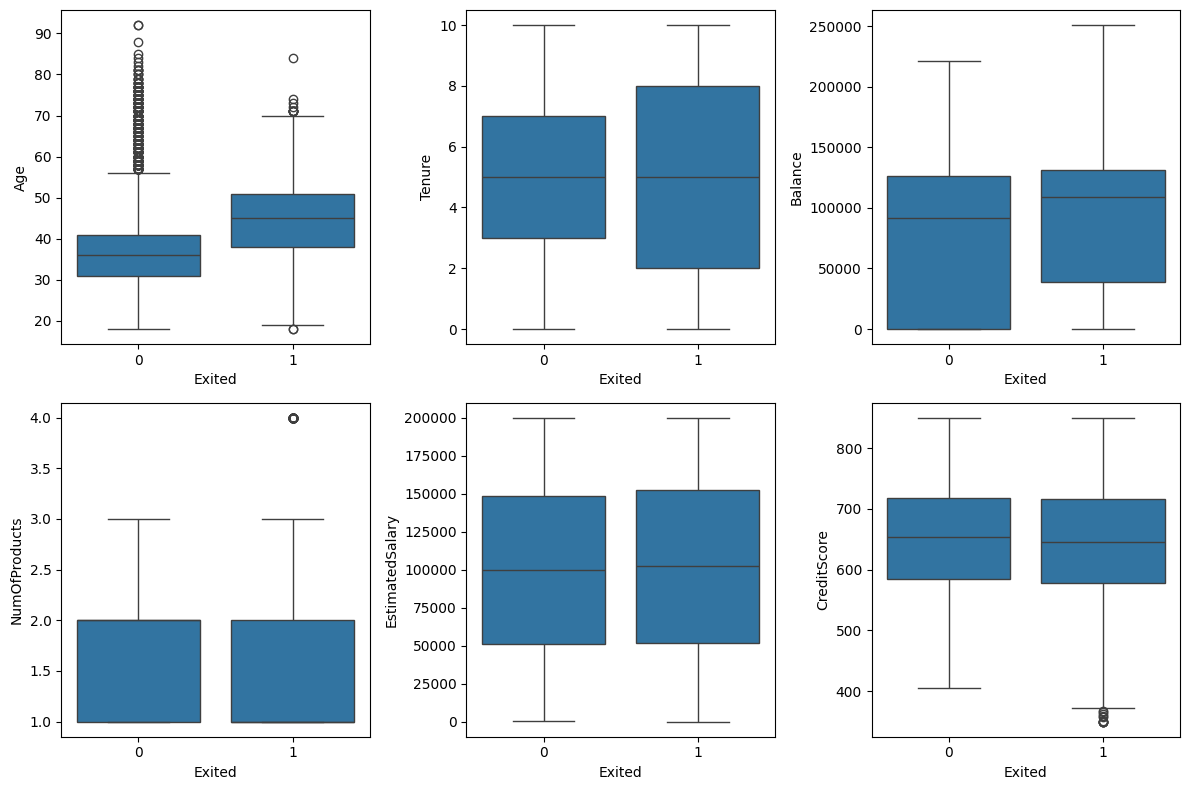

In [ ]:
# Análise da relação entre as variáveis e o alvo
# Variáveis numéricas
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary','CreditScore']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Exited', y=col, data=df)
plt.tight_layout()
plt.show()

###### Aqui, ao visualizar a contagem de valores de cada variável categórica em relação a variável *target*, podemos observar uma presença da França na categoria "Geography", assim como de "1" em "HasCrCard".

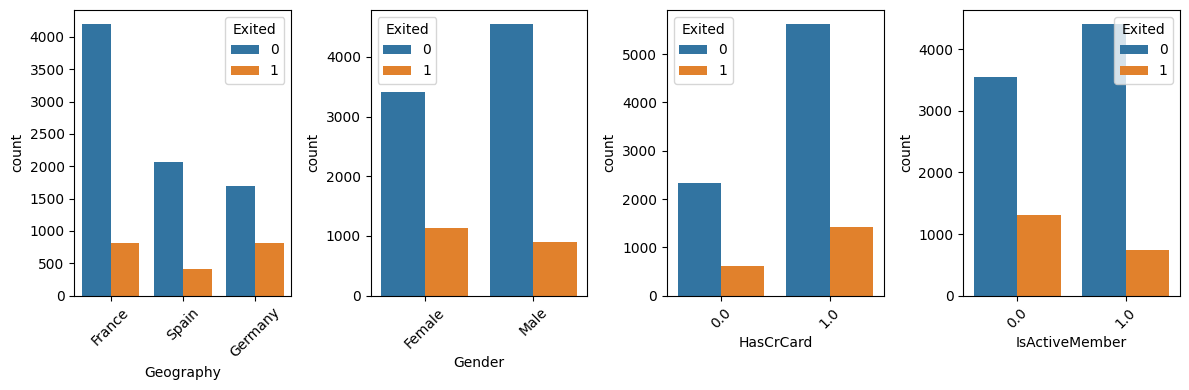

In [ ]:
# Variáveis categóricas
plt.figure(figsize=(12, 4))
for i, col in enumerate(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']):
    plt.subplot(1, 4, i + 1)
    sns.countplot(x=col, hue='Exited', data=df)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def plotar_value_counts(df, coluna, bar_color='skyblue'):
    plt.figure(figsize=(5,3))
    df[coluna].value_counts(dropna=True).plot(kind='bar', color=bar_color)
    plt.xlabel("Classe")
    plt.ylabel("Frequência")
    plt.title(f"{coluna}")
    plt.show()

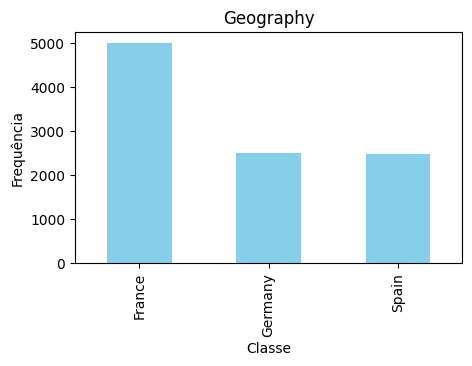

In [ ]:
plotar_value_counts(df, 'Geography')

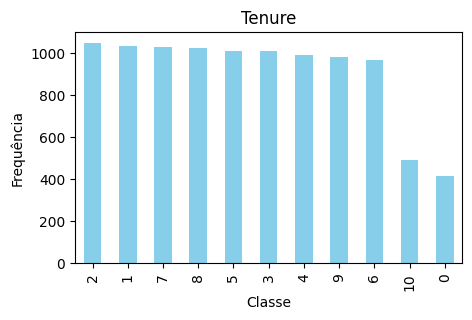

In [ ]:
plotar_value_counts(df, 'Tenure')

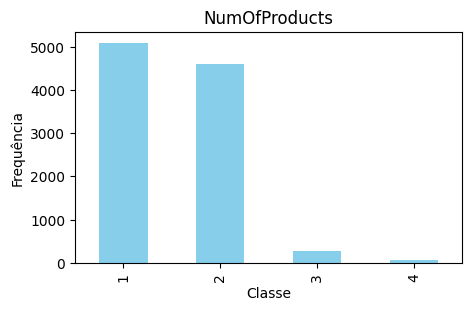

In [ ]:
plotar_value_counts(df, 'NumOfProducts')

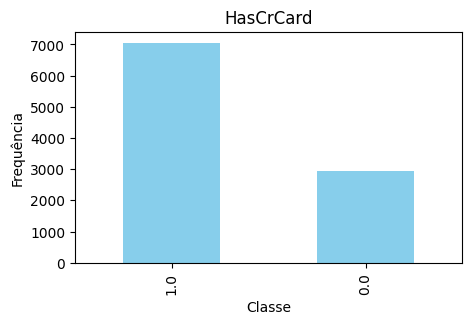

In [ ]:
plotar_value_counts(df, 'HasCrCard')

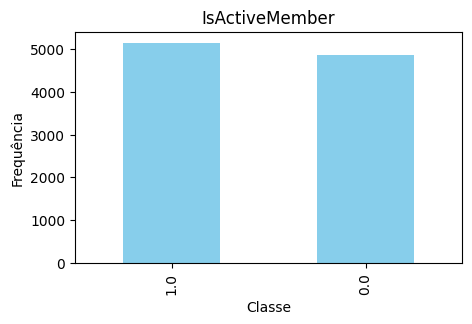

In [ ]:
plotar_value_counts(df, 'IsActiveMember')

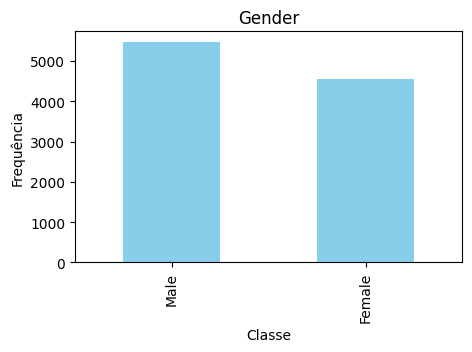

In [ ]:
plotar_value_counts(df, 'Gender')

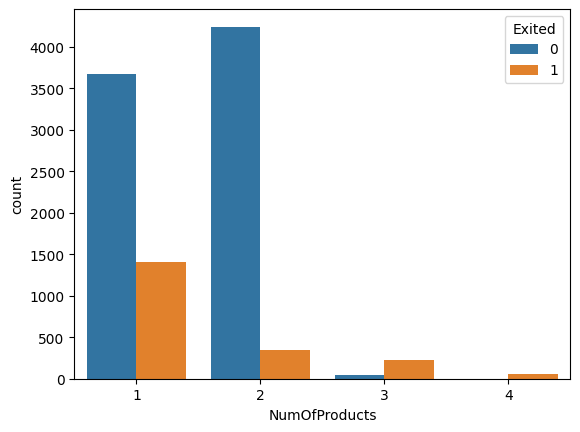

In [ ]:
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.show()

In [ ]:
def plotar_frequencias_relativas(df, coluna, corte_frequencia=5):
    plt.figure(figsize=(5,3))
    frequencias_relativas = df[coluna].value_counts(dropna=False, normalize=True) * 100
    frequencias_relativas.plot(kind='bar', color='skyblue')
    plt.axhline(y=corte_frequencia, color='red', linestyle='--')
    plt.title(f'{coluna} - Percentual de presença')
    plt.xlabel("Classe")
    plt.ylabel("Percentual de Presença (%)")
    plt.show()

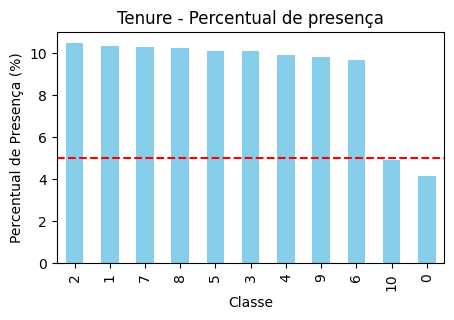

In [ ]:
plotar_frequencias_relativas(df, 'Tenure')

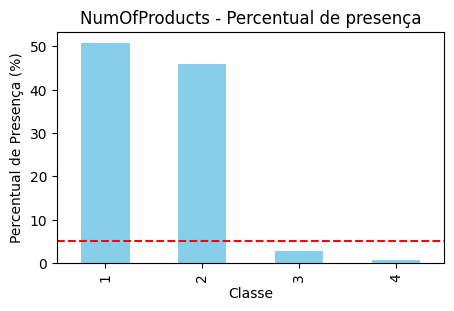

In [ ]:
plotar_frequencias_relativas(df, 'NumOfProducts')

In [ ]:
from pandas.api.types import is_numeric_dtype
class DataFrameAnalyzer:
    def __init__(self, df):
        """
        Inicializa a classe com o DataFrame fornecido.

        Args:
          df: DataFrame de entrada.
        """
        self.df = df

    def variaveis_constantes(self):
        """
        Identifica variáveis constantes no DataFrame.

        Returns:
          Lista de nomes de colunas com valores constantes.
        """
        variaveis_constantes = []
        for col in self.df.columns:
            if self.df[col].nunique() <= 1:
                variaveis_constantes.append(col)
        return variaveis_constantes

    def variaveis_alta_cardinalidade(self, limiar=0.8):
        """
        Identifica variáveis com alta cardinalidade no DataFrame.

        Args:
          limiar: Limiar para alta cardinalidade (padrão 0.8).

        Returns:
          Lista de nomes de colunas com alta cardinalidade.
        """
        variaveis_alta_cardinalidade = []
        for col in self.df.columns:
            if self.df[col].nunique() / len(self.df) >= limiar:
                variaveis_alta_cardinalidade.append(col)
        return variaveis_alta_cardinalidade

    def variaveis_alta_correlacao(self, threshold=0.9):
        """
        Identifica pares de variáveis numéricas que possuem alta correlação.

        Args:
          threshold: Limiar para considerar alta correlação (padrão 0.9).

        Returns:
          Lista de tuplas com pares de variáveis altamente correlacionadas.
        """
        correlacao = self.df.select_dtypes(include=[np.number]).corr()
        pares_correlacionados = []

        for i in range(len(correlacao.columns)):
            for j in range(i):
                if abs(correlacao.iloc[i, j]) > threshold:
                    colname1 = correlacao.columns[i]
                    colname2 = correlacao.columns[j]
                    pares_correlacionados.append((colname1, colname2))

        return pares_correlacionados

    def variaveis_valores_ausentes(self):
        """
        Identifica variáveis com valores ausentes no DataFrame.

        Returns:
          Dicionário com nomes de colunas e a porcentagem de valores ausentes.
        """
        valores_ausentes = self.df.isnull().sum()
        percentuais_ausentes = (valores_ausentes / len(self.df)) * 100
        variaveis_ausentes = percentuais_ausentes[percentuais_ausentes > 0].sort_values(ascending=False)

        return variaveis_ausentes.to_dict()

    def linhas_duplicadas(self):
        """
        Identifica linhas duplicadas no DataFrame.

        Returns:
          Número de linhas duplicadas.
        """
        return self.df.duplicated().sum()

    def variaveis_variancia_zero(self):
        """
        Identifica variáveis com variância zero no DataFrame.

        Returns:
          Lista de nomes de colunas com variância zero.
        """
        variaveis_variancia_zero = []
        for col in self.df.select_dtypes(include=[np.number]).columns:
            if self.df[col].var() == 0:
                variaveis_variancia_zero.append(col)
        return variaveis_variancia_zero

    def alta_quantidade_valores_ausentes(self, threshold=50):
        """
        Identifica variáveis com alta quantidade de valores ausentes no DataFrame.

        Args:
          threshold: Limiar para considerar alta quantidade de valores ausentes (padrão 50%).

        Returns:
          Lista de nomes de colunas com alta quantidade de valores ausentes.
        """
        valores_ausentes = self.df.isnull().sum() / len(self.df) * 100
        return valores_ausentes[valores_ausentes > threshold].index.tolist()

    def variaveis_assimetria(self):
        """
        Identifica variáveis numéricas com alta assimetria (skewness) no DataFrame.

        Returns:
          Dicionário com nomes de colunas e seus respectivos valores de skewness.
        """
        skewness = self.df.select_dtypes(include=[np.number]).apply(lambda x: x.skew()).dropna()
        skewness = skewness[abs(skewness) > 1]  # Considerando alta assimetria se skewness > 1 ou < -1
        return skewness.to_dict()

    def variaveis_mono(self):
        """
        Identifica variáveis monotônicas no DataFrame.

        Returns:
          Lista de nomes de colunas monotônicas.
        """
        monotonic_cols = []
        for col in self.df.select_dtypes(include=[np.number]).columns:
            if self.df[col].is_monotonic_increasing or self.df[col].is_monotonic_decreasing:
                monotonic_cols.append(col)
        return monotonic_cols

    def variaveis_rejeitadas(self):
        """
        Identifica variáveis rejeitadas no DataFrame, como constantes ou com alta quantidade de valores ausentes.

        Returns:
          Lista de nomes de colunas rejeitadas.
        """
        rejeitadas = self.variaveis_constantes()
        rejeitadas += self.alta_quantidade_valores_ausentes()
        return rejeitadas

    def alta_quantidade_infinidades(self):
        """
        Identifica variáveis com alta quantidade de valores infinitos no DataFrame.

        Returns:
          Dicionário com nomes de colunas e a quantidade de valores infinitos.
        """
        infinitos = self.df.replace([np.inf, -np.inf], np.nan)
        num_infinities = infinitos.isnull().sum() - self.df.isnull().sum()
        return num_infinities[num_infinities > 0].to_dict()

    def clusters_alta_correlacao(self, threshold=0.9):
        """
        Identifica agrupamentos de variáveis numéricas com alta correlação no DataFrame.

        Args:
          threshold: Limiar para considerar alta correlação (padrão 0.9).

        Returns:
          Lista de listas de variáveis que estão altamente correlacionadas entre si.
        """
        correlacao = self.df.select_dtypes(include=[np.number]).corr()
        clusters = []
        visited = set()

        for i in range(len(correlacao.columns)):
            cluster = []
            for j in range(i):
                if abs(correlacao.iloc[i, j]) > threshold:
                    colname1 = correlacao.columns[i]
                    colname2 = correlacao.columns[j]
                    if colname1 not in visited and colname2 not in visited:
                        cluster.extend([colname1, colname2])
                        visited.update([colname1, colname2])
            if cluster:
                clusters.append(cluster)

        return clusters

    def resumo_dataset(self):
        """
        Gera um resumo das características do DataFrame.

        Returns:
          Dicionário com informações sobre o DataFrame.
        """
        num_linhas = self.df.shape[0]
        num_colunas = self.df.shape[1]
        variaveis_numericas = [coluna for coluna in self.df.columns if is_numeric_dtype(self.df[coluna])]

        return {
            'Número de linhas': num_linhas,
            'Número de colunas': num_colunas,
            'Variáveis numéricas': variaveis_numericas,
            'Alertas': '-' * 50,
            'Variáveis com valores constantes': self.variaveis_constantes(),
            'Variáveis com alta cardinalidade': self.variaveis_alta_cardinalidade(),
            'Pares de variáveis com alta correlação': self.variaveis_alta_correlacao(),
            'Variáveis com valores ausentes': self.variaveis_valores_ausentes(),
            'Linhas duplicadas': self.linhas_duplicadas(),
            'Variáveis com variância zero': self.variaveis_variancia_zero(),
            'Variáveis com alta quantidade de valores ausentes': self.alta_quantidade_valores_ausentes(),
            'Variáveis com alta assimetria (skewness)': self.variaveis_assimetria(),
            'Variáveis monotônicas': self.variaveis_mono(),
            'Variáveis rejeitadas': self.variaveis_rejeitadas(),
            'Variáveis com alta quantidade de valores infinitos': self.alta_quantidade_infinidades(),
            'Agrupamentos de alta correlação': self.clusters_alta_correlacao()
        }

In [ ]:
# Obtendo informações gerais do dataframe
analyzer = DataFrameAnalyzer(df)
analyzer.resumo_dataset()
for key, value in analyzer.resumo_dataset().items():
    print(f"{key}: {value}")

Número de linhas: 10002
Número de colunas: 14
Variáveis numéricas: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Alertas: --------------------------------------------------
Variáveis com valores constantes: []
Variáveis com alta cardinalidade: ['RowNumber', 'CustomerId', 'EstimatedSalary']
Pares de variáveis com alta correlação: []
Variáveis com valores ausentes: {'Geography': 0.009998000399920015, 'Age': 0.009998000399920015, 'HasCrCard': 0.009998000399920015, 'IsActiveMember': 0.009998000399920015}
Linhas duplicadas: 2
Variáveis com variância zero: []
Variáveis com alta quantidade de valores ausentes: []
Variáveis com alta assimetria (skewness): {'Age': 1.0112923126485627, 'Exited': 1.4711571619920734}
Variáveis monotônicas: ['RowNumber']
Variáveis rejeitadas: []
Variáveis com alta quantidade de valores infinitos: {}
Agrupamentos de alta correlação: []


### 3. Tratamento de dados


###### Conforme escrito acima, as variáveis NumOfProducts e Tenure tinham valores com baixa frequência, portanto foram feitas duas manipulações para tnetar atenuar essa questão que pode causar problemas na separação de treino e teste.

###### **Tenure**: Agrupamento de 10 e 0 como "Outros", uma vez que são valores discrepentes e distantes um do outro, portanto unido dessa forma.
###### **NumOfProducts**: Unir o valor 4 com 3, uma vez que geram valores baíxissimos contados - é importante salientar o contexto que teria que ser apontado.

###### Após a análise inicial por meio do EDA, iniciou-se o processo de tratamento de dados com o objetivo de remover variáveis irrelevantes para o modelo e evitar qualquer tipo de problema. Desse modo, foras excluídas três variáveis (Surname, CustomerId, RowNumber) por diferentes fatores:

###### **Surname**: por apontar uma informação textual que é irrelevante e com alta cardinalidade sem significado preditivo, podendo adicionar ruído ao modelo;

###### **CustomerId**: representar um identificador único sem relação com os padrões dos dados, não trazendo informações úteis para o modelo;

###### **RowNumber**: por indicar apenas a posição do registro na base de dados, sem influência real sobre a variável alvo.

######Após isso, os valores "NA" foram excluídos - foi escolhida essa abordagem por ser apenas dois valores ausentes que não seriam capazes de interferir no modelo a princípio.

##### O dataframe foi, posteriormente, segmentando em "df_num" e "df_cat" a partir do tipo delas para fazer os demais processos futuros.

###### Foi criado uma matriz de confusão entre as variáveis numéricas com o objetivo de analisar a correlação entre essas *features*, podendo ser visto que não há correlações significantes entre elas - sendo o que mais chama a atenção é entre "balance" e "NumOfProducts" com "apenas" -0.32.

In [ ]:
df['NumOfProducts'] = df['NumOfProducts'].replace([3, 4], 3)

In [ ]:
df['Tenure'] = df['Tenure'].astype(str)

In [ ]:
df['Tenure'] = df['Tenure'].replace(["10", "0"], "Outros")

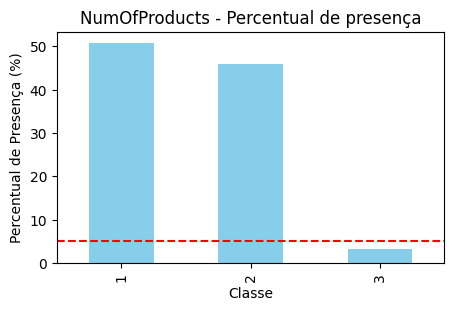

In [ ]:
plotar_frequencias_relativas(df, 'NumOfProducts')

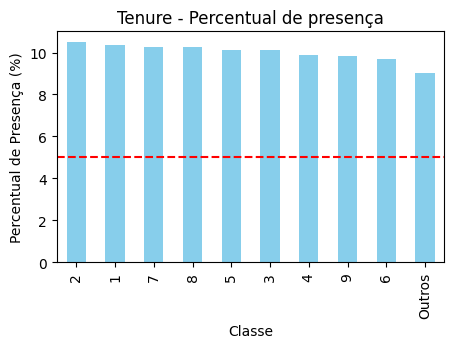

In [ ]:
plotar_frequencias_relativas(df, 'Tenure')

In [ ]:
# Remoção colunas irrelevantes para o modelo
df = df.drop(columns=['Surname','CustomerId','RowNumber'])

In [ ]:
# Remoção de valores nulos
df = df.dropna()

In [ ]:
# Separação de variáveis numéricas e categóricas
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

In [ ]:
# Agora, análise de quais são os rótulos presentes em cada variável presente no dataframe de variáveis numéricas
for col in df_num.columns:
    print(f"{col}: {df_num[col].unique()}")

CreditScore: [619 608 502 699 645 376 528 497 476 549 635 616 653 587 726 732 636 510
 669 846 577 756 571 574 411 591 533 553 520 722 475 490 804 850 582 472
 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725 511 614 742
 687 555 684 603 751 581 735 661 675 738 813 657 604 519 664 678 757 416
 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773 814 710
 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625 432 770
 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535 716 539
 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778 514 525
 715 580 807 501 521 759 516 711 618 643 671 689 620 676 572 695 592 567
 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771 681
 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799 602
 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644 626
 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593 801
 611 802 745 483 690 492 709 705 560 7

In [ ]:
# Agora, análise de quais são os rótulos presentes em cada variável presente no dataframe de variáveis categóricas
for col in df_cat.columns:
    print(f"{col}: {df_cat[col].unique()}")

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Tenure: ['2' '1' '8' '4' '6' '3' 'Outros' '5' '7' '9']


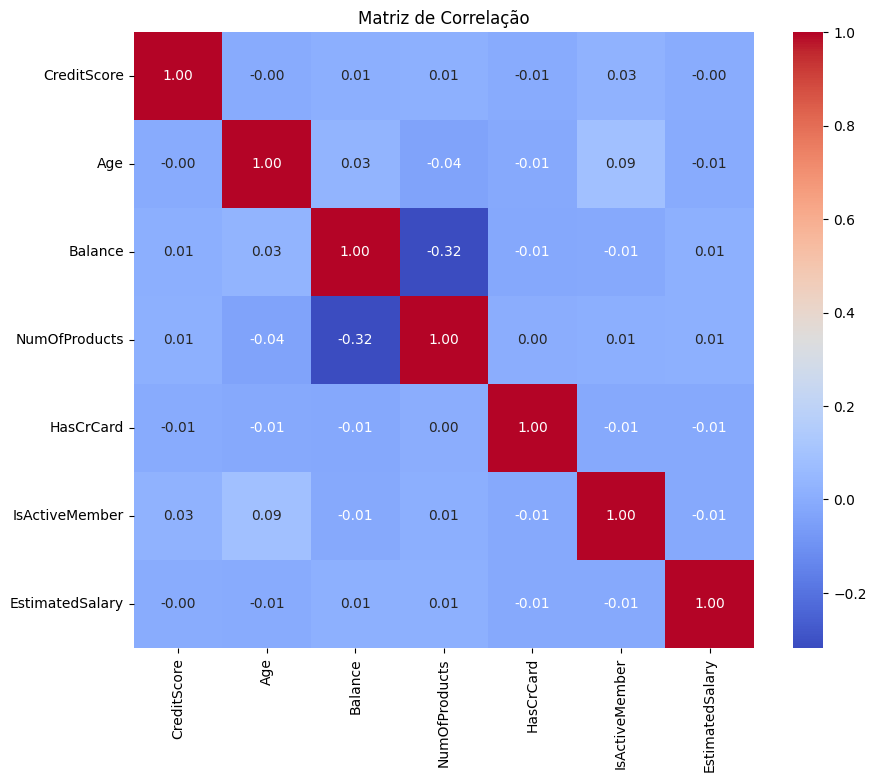

In [ ]:
# Matriz de correlação para variáveis numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df_num.loc[:, df_num.columns != 'Exited'].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### 4. Tratamento de *outliers*

###### Posteriormente ao processo de tratamento de dados, optou-se por não realizar nenhum tratamento de *outliers*, uma vez que os principais candidatos a *outliers* foram da variável Age e CreditScore, o que significa que são informações importantes, portanto que sua exclusão, por exemplo, pode ser uma perda importante de informações.

### 5. Encoding e normalização
###### Na etapa de encoding e normalização, inicialmente foi feito o processo do primeiro por meio do "get_dummies", método do pandas em que as categorias se transformaram em colunas (variáveis) onde o número 1 representa o valor afirmativo e o 0 negativo. Essa fase foi feita antes da divisão em treino e teste, ao contrário da etapa de normalização, feita a partir do StandardScaler. Já nessa última, porém, a normalização foi feita após a divisão com o objetivo de evitar a contaminação das bases.

###### O StandardScaler é uma ferramenta da biblioteca Scikit-learn usada para padronizar os dados, transformando-os para que tenham média 0 e desvio padrão 1, garantindo que as variáveis numéricas com escalas diferentes não influenciem de forma desproporcional os modelos de aprendizado de máquina.

In [ ]:
# Uso do encoding (get_dummies)
df_cat = pd.get_dummies(df_cat, drop_first=True)

# Concatenação variáveis numéricas e categóricas
df_processed = pd.concat([df_num, df_cat], axis=1)

# Separação variáveis explicativas (X) e alvo (y)
X = df_processed.drop('Exited', axis=1)
y = df_processed['Exited']

# Divisão os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronização das variáveis numéricas
numerical_cols = df_num.drop('Exited', axis=1).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
# Importação de modelos adicionais
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

# Treinar e avaliar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidade para classe positiva

    print(f"Modelo: {name}")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}\n")

# Ajuste de hiperparâmetros para RandomForest
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 20]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, scoring='f1', cv=5)
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)

Modelo: Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1572
           1       0.67      0.20      0.31       428

    accuracy                           0.81      2000
   macro avg       0.74      0.59      0.60      2000
weighted avg       0.79      0.81      0.76      2000

AUC-ROC: 0.7598

Modelo: Random Forest
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1572
           1       0.76      0.44      0.56       428

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.84      0.85      0.83      2000

AUC-ROC: 0.8494

Modelo: XGBoost
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1572
           1       0.69      0.48      0.57       428

    accuracy                           0.84      2000
   macro avg       0.78     

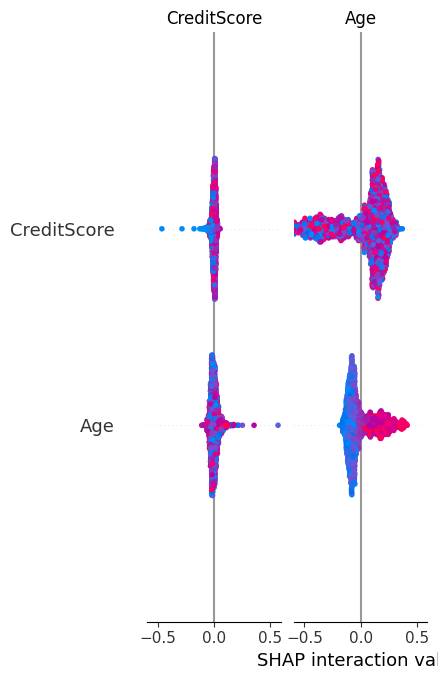

In [ ]:
# Explicabilidade com SHAP
import shap

best_model = grid.best_estimator_  # Melhor modelo encontrado
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)